In [8]:
import pandas as pd 

In [4]:
#Mount the drive to colab notebook
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
cd gdrive/MyDrive/

/content/gdrive/MyDrive


In [9]:
#Dataset: https://www.kaggle.com/c/fake-news/data#
data = pd.read_csv("train.csv")

In [10]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [11]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [12]:
data.value_counts()

id     title                                                                                        author                             text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [ ]:
#drop na values 
data.dropna()

In [14]:
# Get the Independent Features
X=data.drop('label',axis=1)

In [15]:
## Get the Dependent features
y=data['label']

In [16]:
type(y)

pandas.core.series.Series

In [17]:
data.shape

(20800, 5)

In [18]:
# vocabulary_size is nothing but dictionary of 10k words whitin those words sentences will form 
vocabulary_size = 5000

In [19]:
messages = data.copy()

In [20]:
# y reset_index(), becoz values were dropped 
messages.reset_index()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...,...
20795,20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [21]:
import nltk
import re
from nltk.corpus import stopwords

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### preprocessing 

In [23]:
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Embedding

In [24]:

ps = PorterStemmer()
corpus = []
for i in range(len(messages)):
  print(i)
  review = re.sub('[^a-zA-Z]', '  ',  str(messages['title'][i]))
  review = review.lower()
  # coverting sentences into list of words  
  review = review.split()
  review = [ps.stem(word) for word in review if  not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)


Streaming output truncated to the last 5000 lines.
15800
15801
15802
15803
15804
15805
15806
15807
15808
15809
15810
15811
15812
15813
15814
15815
15816
15817
15818
15819
15820
15821
15822
15823
15824
15825
15826
15827
15828
15829
15830
15831
15832
15833
15834
15835
15836
15837
15838
15839
15840
15841
15842
15843
15844
15845
15846
15847
15848
15849
15850
15851
15852
15853
15854
15855
15856
15857
15858
15859
15860
15861
15862
15863
15864
15865
15866
15867
15868
15869
15870
15871
15872
15873
15874
15875
15876
15877
15878
15879
15880
15881
15882
15883
15884
15885
15886
15887
15888
15889
15890
15891
15892
15893
15894
15895
15896
15897
15898
15899
15900
15901
15902
15903
15904
15905
15906
15907
15908
15909
15910
15911
15912
15913
15914
15915
15916
15917
15918
15919
15920
15921
15922
15923
15924
15925
15926
15927
15928
15929
15930
15931
15932
15933
15934
15935
15936
15937
15938
15939
15940
15941
15942
15943
15944
15945
15946
15947
15948
15949
15950
15951
15952
15953
15954
15955
15956
15957
1

In [25]:
one_hot_rep  = [one_hot (words,vocabulary_size) for words in corpus]

In [26]:
print("Before stemming::",messages['title'][0])
print("Post processing::",corpus[0])
print("Word vectors::  ",one_hot_rep[0])

Before stemming:: House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
Post processing:: hous dem aid even see comey letter jason chaffetz tweet
Word vectors::   [3039, 2518, 4814, 272, 169, 2049, 4889, 634, 3490, 649]


In [27]:
print("Before processing::",messages['title'][2])
print("Post processing::",corpus[2])
print("Word vectors::  ",one_hot_rep[2])

Before processing:: Why the Truth Might Get You Fired
Post processing:: truth might get fire
Word vectors::   [822, 2402, 278, 2393]


##### observation: sentence lengh are diffrent after applying processing technique. So it is recommended to use padding to feed same size input stirng to embedding layer of model 

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
sent_lengh =  20 
embedd_docs = pad_sequences(one_hot_rep, padding='pre', maxlen=sent_lengh)
print(embedd_docs)

[[   0    0    0 ...  634 3490  649]
 [   0    0    0 ... 1704 2207  540]
 [   0    0    0 ... 2402  278 2393]
 ...
 [   0    0    0 ... 1954 2707 2451]
 [   0    0    0 ... 1297 2903  103]
 [   0    0    0 ... 3517 1341 3107]]


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding

### creating model

##### In simple terms, an embedding leayer tries to find the optimal mapping of each of the unique words to a vector of real numbers. The size of that vectors is equal to the output_dim

In [31]:
embedding_vector_features = 40 
model = Sequential()
model.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sent_lengh))
# one LSTM layer with 100 neurons
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

In [32]:
#compile model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics= ['accuracy'])

In [33]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________


In [34]:
type(embedd_docs)

numpy.ndarray

In [35]:
import numpy as np
X_final = np.array(embedd_docs)
y_final = np.array(y)

In [36]:
type(y_final)

numpy.ndarray

In [37]:
X_final.shape

(20800, 20)

In [38]:
y_final.shape

(20800,)

In [39]:
## split data into train and validation
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

### model training

In [40]:
### Finally Training
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 9s 9ms/step - loss: 0.4592 - accuracy: 0.7907 - val_loss: 0.1877 - val_accuracy: 0.9229
Epoch 2/10
218/218 [==============================] - 1s 7ms/step - loss: 0.1351 - accuracy: 0.9487 - val_loss: 0.1881 - val_accuracy: 0.9213
Epoch 3/10
218/218 [==============================] - 1s 7ms/step - loss: 0.0905 - accuracy: 0.9690 - val_loss: 0.2225 - val_accuracy: 0.9245
Epoch 4/10
218/218 [==============================] - 1s 7ms/step - loss: 0.0658 - accuracy: 0.9779 - val_loss: 0.2961 - val_accuracy: 0.9237
Epoch 5/10
218/218 [==============================] - 1s 7ms/step - loss: 0.0422 - accuracy: 0.9876 - val_loss: 0.2835 - val_accuracy: 0.9194
Epoch 6/10
218/218 [==============================] - 2s 7ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.3383 - val_accuracy: 0.9218
Epoch 7/10
218/218 [==============================] - 2s 7ms/step - loss: 0.0200 - accuracy: 0.9947 - val_loss: 0.4045 - val_accuracy: 0.9174
Epoch 

### apply: Hyper prameter 

In [41]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sent_lengh))
model2.add(Dropout(0.3))
model2.add(LSTM(100))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [42]:
# fit model on training data
model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 3s 9ms/step - loss: 0.4778 - accuracy: 0.7354 - val_loss: 0.2121 - val_accuracy: 0.9183
Epoch 2/10
218/218 [==============================] - 2s 7ms/step - loss: 0.1488 - accuracy: 0.9452 - val_loss: 0.1944 - val_accuracy: 0.9189
Epoch 3/10
218/218 [==============================] - 1s 7ms/step - loss: 0.1042 - accuracy: 0.9643 - val_loss: 0.2176 - val_accuracy: 0.9258
Epoch 4/10
218/218 [==============================] - 1s 7ms/step - loss: 0.0735 - accuracy: 0.9750 - val_loss: 0.2258 - val_accuracy: 0.9257
Epoch 5/10
218/218 [==============================] - 2s 7ms/step - loss: 0.0455 - accuracy: 0.9854 - val_loss: 0.2631 - val_accuracy: 0.9240
Epoch 6/10
218/218 [==============================] - 2s 7ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.2913 - val_accuracy: 0.9213
Epoch 7/10
218/218 [==============================] - 2s 7ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.3281 - val_accuracy: 0.9231
Epoch 

####### valdiation accuracy changed from 0.9155(model) to 0.9199 (model2 with dropout layers )

#### Performance Metrics And Accuracy

In [43]:
#Model prediction
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import seaborn as sns

In [45]:
confusion_matrix(y_test, y_pred)

array([[3165,  284],
       [ 320, 3095]])

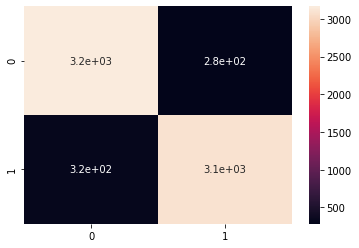

In [46]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [47]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.912004662004662

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.91      3449
           1       0.92      0.91      0.91      3415

    accuracy                           0.91      6864
   macro avg       0.91      0.91      0.91      6864
weighted avg       0.91      0.91      0.91      6864



### Bidirectional LSTM

In [54]:
## Creating model
embedding_vector_features=40
model3=Sequential()
model3.add(Embedding(vocabulary_size,embedding_vector_features,input_length=sent_lengh))
model3.add(Bidirectional(LSTM(100)))
model3.add(Dropout(0.3))
model3.add(Dense(1,activation='sigmoid'))


In [56]:
# compile model
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
# model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            200000    
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
# fit model on training data
model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
218/218 [==============================] - 5s 11ms/step - loss: 0.3921 - accuracy: 0.7945 - val_loss: 0.2027 - val_accuracy: 0.9199
Epoch 2/10
218/218 [==============================] - 2s 9ms/step - loss: 0.1267 - accuracy: 0.9554 - val_loss: 0.2133 - val_accuracy: 0.9152
Epoch 3/10
218/218 [==============================] - 2s 9ms/step - loss: 0.0886 - accuracy: 0.9714 - val_loss: 0.2115 - val_accuracy: 0.9223
Epoch 4/10
218/218 [==============================] - 2s 9ms/step - loss: 0.0496 - accuracy: 0.9846 - val_loss: 0.2834 - val_accuracy: 0.9203
Epoch 5/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0256 - accuracy: 0.9924 - val_loss: 0.3181 - val_accuracy: 0.9190
Epoch 6/10
218/218 [==============================] - 2s 8ms/step - loss: 0.0180 - accuracy: 0.9955 - val_loss: 0.3838 - val_accuracy: 0.9127
Epoch 7/10
218/218 [==============================] - 2s 9ms/step - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.4829 - val_accuracy: 0.9138
Epoch

In [61]:
#Model prediction
y_pred3=model3.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [62]:
confusion_matrix(y_test, y_pred3)

array([[3085,  364],
       [ 209, 3206]])

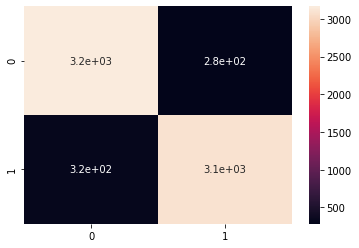

In [63]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)